Matplotlib is building the font cache; this may take a moment.


               Job Title       Industry  Job Status AI Impact Level  \
0     Investment analyst             IT  Increasing        Moderate   
1  Journalist, newspaper  Manufacturing  Increasing        Moderate   
2      Financial planner        Finance  Increasing             Low   
3        Legal secretary     Healthcare  Increasing            High   
4  Aeronautical engineer             IT  Increasing             Low   

   Median Salary (USD) Required Education  Experience Required (Years)  \
0             42109.76    Master’s Degree                            5   
1            132298.57    Master’s Degree                           15   
2            143279.19  Bachelor’s Degree                            4   
3             97576.13   Associate Degree                           15   
4             60956.63    Master’s Degree                           13   

   Job Openings (2024)  Projected Openings (2030)  Remote Work Ratio (%)  ...  \
0                 1515                       63

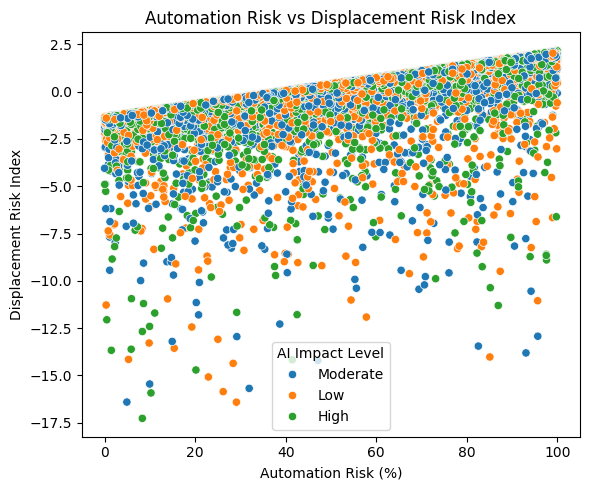

In [2]:

%pip install seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read data

df_ai = pd.read_csv('ai_job_trends_dataset_cleaned.csv', encoding='utf-8')

# Basic cleanups
for col in ['Median Salary (USD)', 'Experience Required (Years)', 'Job Openings (2024)', 'Projected Openings (2030)', 'Remote Work Ratio (%)', 'Automation Risk (%)', 'Gender Diversity (%)', 'Openings Growth (#)', 'Openings Growth (%)', 'Displacement Risk Index']:
    if col in df_ai.columns:
        df_ai[col] = pd.to_numeric(df_ai[col], errors='coerce')

# Show head so the user sees what we loaded
print(df_ai.head())


#
#1) Insight: Displacement Risk vs Automation Risk (are they aligned?)
plt.figure(figsize=(6,5))
sns.scatterplot(data=df_ai, x='Automation Risk (%)', y='Displacement Risk Index', hue='AI Impact Level')
plt.title('Automation Risk vs Displacement Risk Index')
plt.xlabel('Automation Risk (%)')
plt.ylabel('Displacement Risk Index')
plt.tight_layout()
plt.show()





### 1) Automation Risk aligns strongly with Displacement Risk
There’s a strong positive relationship: higher automation risk tends to come with higher displacement risk—useful for workforce planning and upskilling strategies.


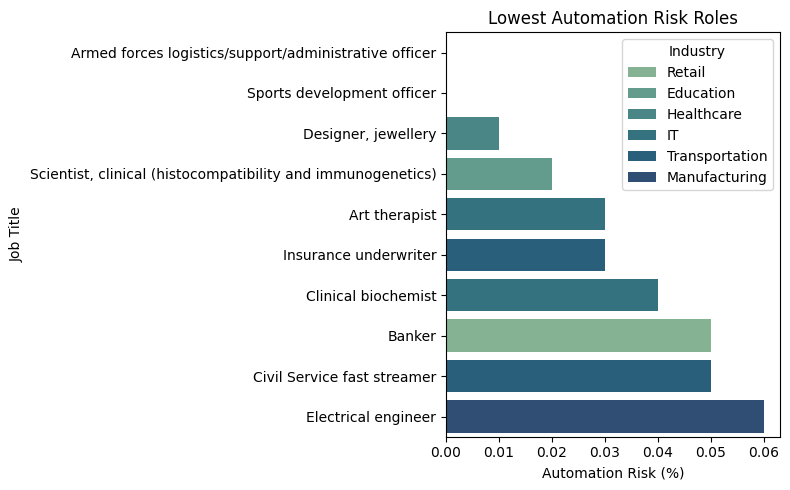

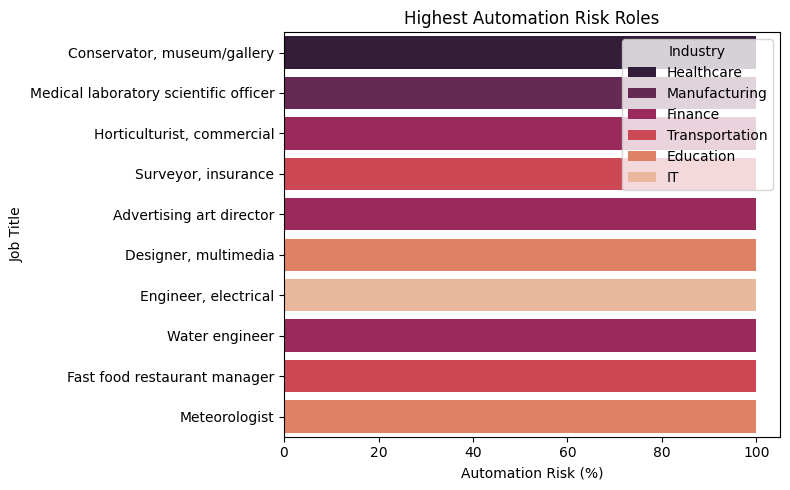

In [3]:


# Ensure numeric columns are numeric (if not already from previous cell)
for col in ['Median Salary (USD)', 'Experience Required (Years)', 'Job Openings (2024)', 'Projected Openings (2030)', 'Remote Work Ratio (%)', 'Automation Risk (%)', 'Openings Growth (#)', 'Openings Growth (%)']:
    if col in df_ai.columns:
        df_ai[col] = pd.to_numeric(df_ai[col], errors='coerce')

# 2) Top and bottom 10 job titles by automation risk
risk_sorted = df_ai[['Job Title','Industry','Automation Risk (%)']].dropna().sort_values('Automation Risk (%)')
low_risk = risk_sorted.head(10)
high_risk = risk_sorted.tail(10)

plt.figure(figsize=(8,5))
sns.barplot(data=low_risk, x='Automation Risk (%)', y='Job Title', hue='Industry', dodge=False, palette='crest')
plt.title('Lowest Automation Risk Roles')
plt.xlabel('Automation Risk (%)')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(data=high_risk, x='Automation Risk (%)', y='Job Title', hue='Industry', dodge=False, palette='rocket')
plt.title('Highest Automation Risk Roles')
plt.xlabel('Automation Risk (%)')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()








### 2) Roles least vs. most exposed to automation
A quick scan of extremes helps target reskilling and protection strategies.

- The first chart shows the 10 job titles with the lowest automation risk.
- The second chart shows the 10 job titles with the highest automation risk.




<ipython-input-6-e9c41ad02f9a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=growth_by_ind.index, y=growth_by_ind.values, palette='mako')


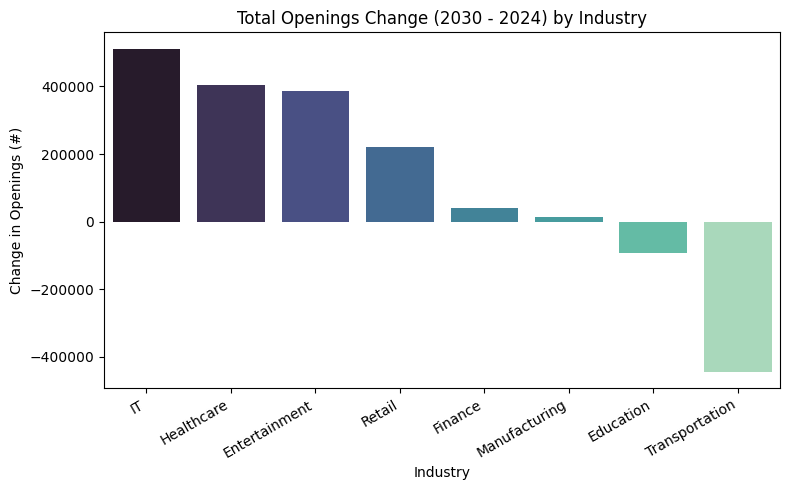

In [6]:

# 3) Absolute openings change by industry (2030-2024)
if 'Openings Growth (#)' in df_ai.columns and df_ai['Openings Growth (#)'].notna().any():
    growth_by_ind = df_ai.groupby('Industry')['Openings Growth (#)'].sum().sort_values(ascending=False)
else:
    growth_by_ind = (df_ai['Projected Openings (2030)'] - df_ai['Job Openings (2024)']).groupby(df_ai['Industry']).sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=growth_by_ind.index, y=growth_by_ind.values, palette='mako')
plt.title('Total Openings Change (2030 - 2024) by Industry')
plt.xlabel('Industry')
plt.ylabel('Change in Openings (#)')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

### 3) Industries driving absolute job growth
Which sectors add the most net openings through 2030?

- Top industries by total openings change:


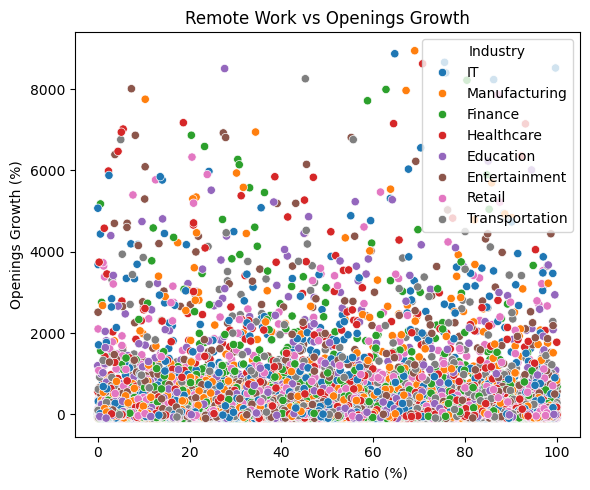

                                               Job Title    Industry  \
9571   Armed forces logistics/support/administrative ...      Retail   
22104                         Sports development officer   Education   
29215                                Designer, jewellery  Healthcare   
4047   Scientist, clinical (histocompatibility and im...   Education   
29234                                      Art therapist          IT   

       Automation Risk (%)  
9571                  0.00  
22104                 0.00  
29215                 0.01  
4047                  0.02  
29234                 0.03  
                          Job Title        Industry  Automation Risk (%)
3691           Designer, multimedia       Education                99.98
3287           Engineer, electrical              IT                99.98
12714                Water engineer         Finance                99.98
14665  Fast food restaurant manager  Transportation                99.99
18947                 Meteor

In [7]:
# 4) Remote ratio vs openings growth
plt.figure(figsize=(6,5))
sns.scatterplot(data=df_ai, x='Remote Work Ratio (%)', y='Openings Growth (%)', hue='Industry')
plt.title('Remote Work vs Openings Growth')
plt.xlabel('Remote Work Ratio (%)')
plt.ylabel('Openings Growth (%)')
plt.tight_layout()
plt.show()

# Print concise tables/metrics supporting the insights
print(low_risk.head())
print(high_risk.tail())
print(growth_by_ind.head())

### 4) Remote work intensity vs. openings growth
Are remote-heavy roles growing faster?

- This view helps you spot industries or clusters where remote adoption correlates with expansion.



['Job Title', 'Industry', 'Job Status', 'AI Impact Level', 'Median Salary (USD)', 'Required Education', 'Experience Required (Years)', 'Job Openings (2024)', 'Projected Openings (2030)', 'Remote Work Ratio (%)', 'Automation Risk (%)', 'Location', 'Gender Diversity (%)', 'Openings Growth (#)', 'Openings Growth (%)', 'Openings Growth (%) Z', 'Automation Risk (%) Z', 'Displacement Risk Index', 'Median Salary (USD) (wins)', 'Openings Growth (%) (wins)', 'Automation Risk (%) (wins)']
               Job Title       Industry  Job Status AI Impact Level  \
0     Investment analyst             IT  Increasing        Moderate   
1  Journalist, newspaper  Manufacturing  Increasing        Moderate   
2      Financial planner        Finance  Increasing             Low   

   Median Salary (USD) Required Education  Experience Required (Years)  \
0             42109.76    Master’s Degree                            5   
1            132298.57    Master’s Degree                           15   
2        

<ipython-input-8-eb5a6a46f57a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lowest_loc, x='Automation Risk (%)', y='Location', orient='h', palette='crest')


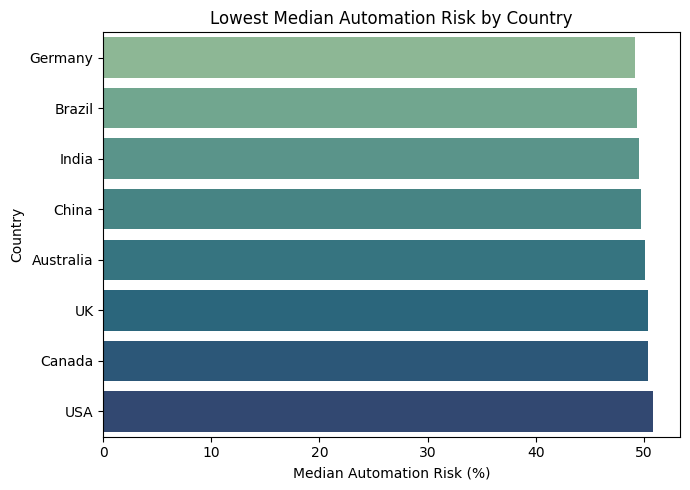

In [8]:
5# Compute countries with lowest automation risk using the 'Location' column as country.
# We'll use median automation risk per country, show the bottom 10, and visualize.
print(df_ai.columns.tolist())
print(df_ai.head(3))

cols = ['Location','Automation Risk (%)']
by_loc = df_ai[cols].dropna()
by_loc = by_loc.groupby('Location', as_index=False)['Automation Risk (%)'].median()
lowest_loc = by_loc.sort_values('Automation Risk (%)', ascending=True).head(10)

print(lowest_loc.head())

plt.figure(figsize=(7,5))
sns.barplot(data=lowest_loc, x='Automation Risk (%)', y='Location', orient='h', palette='crest')
plt.title('Lowest Median Automation Risk by Country')
plt.xlabel('Median Automation Risk (%)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()



### What country shows lowest automation risk?